In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyvista as pv
mesh = pv.read("~/code/uni/ushichka-registration/data/formatted/lidar_roi.ply")

pl = pv.Plotter(off_screen=False, notebook=False)
pl.add_mesh(mesh)
points = []
def onclick(point):
    points.append(point)
    print(f"picked {point}")
pl.enable_surface_picking(callback=onclick)
pl.show()

In [3]:
import numpy as np
points = np.array(points)
points

array([], dtype=float64)

In [4]:
picked_points = np.array([[-3.02017072,  1.91602907, -0.76811603],
       [-2.94146387,  1.97436807, -0.76497208],
       [-2.79947306,  2.0846709 , -0.7584722 ],
       [-2.95145778,  1.86817301, -0.93618609],
       [-2.88422545,  1.95260004, -0.94004291],
       [-2.79349747,  2.01736747, -0.94137936],
       [-2.90292026,  2.15166943, -0.804179  ],
       [-2.94026855,  2.20932992, -0.8097752 ],
       [-2.88185829,  2.13162774, -0.98856108],
       [-2.92712112,  2.21133655, -0.98735138]])

picked_cloud = pv.PolyData(picked_points)
picked_cloud["index"] = [f"{i}" for i in range(picked_points.shape[0])]
pl = pv.Plotter(off_screen=False, notebook=False)
pl.add_mesh(mesh)
pl.add_mesh(picked_cloud, color="green", point_size=25)
pl.add_point_labels(picked_cloud, "index", point_size=5, font_size=36)
points = []
def onclick(point):
    points.append(point)
    print(f"picked {point}")
pl.enable_surface_picking(callback=onclick)
pl.show()

In [53]:
from src.pycv.dmcp import dm_to_world
from src.experiment import Experiment
exp = Experiment("/home/julian/data/dmcp_experiments/round_02/2018-08-19--cam1")
dmIm = exp.load_dmIm()
dmK = exp.load_dmK()
dmP = exp.load_dmP()
la.null_space(dmP) / la.null_space(dmP)[-1]

array([[-0.12298417],
       [ 2.07548531],
       [-0.18351529],
       [ 1.        ]])

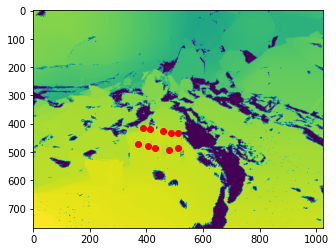

In [48]:
# observe picked points with dmP
picked_points_hat = np.hstack((picked_points,np.ones((picked_points.shape[0],1))))

projected_points = dmP @ picked_points_hat.T
projected_points = projected_points.T 
projected_points = np.array([projected_points[:,0] / projected_points[:,-1], projected_points[:,1] / projected_points[:,-1]]).T

import matplotlib.pyplot as plt

plt.imshow(dmIm, origin="upper",cmap="viridis_r")
plt.scatter(projected_points[:,0], projected_points[:,1],color="red")
plt.show()

In [52]:
from src.pycv.perspective import calibrate_dlt

P_calib = calibrate_dlt(projected_points, picked_points)
import scipy.linalg as la
la.null_space(P_calib) / la.null_space(P_calib)[-1]

array([[-0.12298417],
       [ 2.07548531],
       [-0.18351529],
       [ 1.        ]])

In [54]:
dm_to_world(dmIm, dmK, dmP, dmPts=projected_points)

array([[-3.0347853 ,  1.9152247 , -0.771065  ],
       [-2.9563813 ,  1.9738328 , -0.76804954],
       [-2.8402815 ,  2.084811  , -0.76723856],
       [-2.9736338 ,  1.8665476 , -0.94208723],
       [-2.9280736 ,  1.9506487 , -0.95205647],
       [-2.8148036 ,  2.0169039 , -0.94742584],
       [-2.788659  ,  2.148538  , -0.77866846],
       [-2.9294362 ,  2.2088153 , -0.80736727],
       [-3.4204364 ,  2.1425877 , -1.1457194 ],
       [-2.9270315 ,  2.2113323 , -0.9873257 ]], dtype=float32)

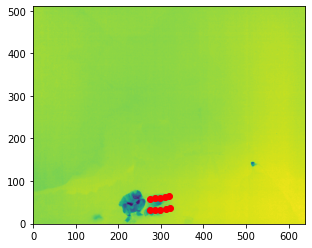

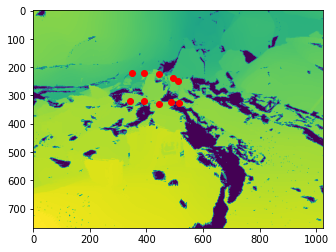

In [65]:
from src.pycv.dmcp import dmcp

imK = exp.load_imK()
imP = exp.load_imP()
imIm = exp.load_imIm()
cps = exp.load_cps()

plt.figure()
plt.imshow(imIm, cmap="viridis_r",origin="lower")
plt.scatter(cps[:,0],cps[:,1],c="red")
plt.show()

plt.figure()
plt.imshow(dmIm, cmap="viridis_r")
plt.scatter(cps[:,2],cps[:,3],c="red")
plt.show()



In [62]:
cps_world = dm_to_world(dmIm, dmK, dmP, cps[:,:2])
cps_world

array([[-5.6203704 ,  1.3409638 ,  0.8446896 ],
       [-5.690001  ,  1.3823546 ,  0.8462383 ],
       [-5.7786508 ,  1.4263432 ,  0.8583835 ],
       [-5.8346877 ,  1.4624368 ,  0.8523198 ],
       [-5.91294   ,  1.5036463 ,  0.8504266 ],
       [-5.6345572 ,  1.3456146 ,  0.98860174],
       [-5.7031894 ,  1.3845643 ,  1.0030503 ],
       [-5.791911  ,  1.4317555 ,  1.0217378 ],
       [-5.873567  ,  1.4772823 ,  1.0227844 ],
       [-5.9470997 ,  1.5167315 ,  1.0263628 ]], dtype=float32)